In [9]:
#!/usr/bin/env python3

import numpy as np
import cv2
import matplotlib.pyplot as plt

def save_cont2(src, predict):
    # Load images as greyscale but make main RGB so we can annotate in colour
    seg  = cv2.imread(predict,cv2.IMREAD_GRAYSCALE)
    ret,seg = cv2.threshold(seg,85,255,cv2.THRESH_BINARY)
#     main = cv2.imread(src,cv2.IMREAD_GRAYSCALE)
    main = cv2.imread(src)
#     main = cv2.cvtColor(main,cv2.COLOR_GRAY2BGR)
    main = cv2.cvtColor(main,cv2.COLOR_BGR2RGB)

    # Dictionary giving RGB colour for label (segment label) - label 1 in red, label 2 in yellow
    RGBforLabel = { 1:(255,0,0), 2:(255,0,0)}

    # Find external contours
    contours,_ = cv2.findContours(seg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    # Iterate over all contours
    for i,c in enumerate(contours):
        # Find mean colour inside this contour by doing a masked mean
        mask = np.zeros(seg.shape, np.uint8)
        cv2.drawContours(mask,[c],-1,255, -1)
        # DEBUG: cv2.imwrite(f"mask-{i}.png",mask)
        mean,_,_,_ = cv2.mean(seg, mask=mask)
        # DEBUG: print(f"i: {i}, mean: {mean}")

        # Get appropriate colour for this label
        label = 2 if mean > 1.0 else 1
        colour = RGBforLabel.get(label)
        # DEBUG: print(f"Colour: {colour}")

        # Outline contour in that colour on main image, line thickness=1
        cv2.drawContours(main,[c],-1,colour,1)

    # Save result
#     cv2.imwrite(src[0:-4]+'_contour.png',main)
    Image.fromarray(main).save(src[0:-4]+'_contour.png')
    plt.imshow(main)

In [12]:
#!/usr/bin/env python3

from PIL import Image, ImageFilter
import numpy as np

def drawContour(m,s,c,RGB):
    """Draw edges of contour 'c' from segmented image 's' onto 'm' in colour 'RGB'"""
    # Fill contour "c" with white, make all else black
    thisContour = s.point(lambda p:p==c and 255)
    ret,thisContour = cv2.threshold(seg,85,255,cv2.THRESH_BINARY)

    # DEBUG: thisContour.save(f"interim{c}.png")

    # Find edges of this contour and make into Numpy array
    thisEdges   = thisContour.filter(ImageFilter.FIND_EDGES)
    thisEdgesN  = np.array(thisEdges)

    # Paint locations of found edges in color "RGB" onto "main"
    m[np.nonzero(thisEdgesN)] = RGB
    return m

# def save_cont(src,predict):
#     # Load segmented image as greyscale
#     seg = Image.open(predict).convert('L')

#     # Load main image - desaturate and revert to RGB so we can draw on it in colour
#     main = Image.open(src).convert('L').convert('RGB')
#     mainN = np.array(main)

#     mainN = drawContour(mainN,seg,1,(255,0,0))   # draw contour 1 in red
# #     mainN = drawContour(mainN,seg,2,(255,0,0)) # draw contour 2 in yellow
# #     mainN = drawContour(mainN,seg,3,(255,0,0)) # draw contour 2 in yellow


#     # Save result
#     Image.fromarray(mainN).save(src[0:-4]+'_contour.png')
#     plt.imshow(mainN)



./test/predict/00.png
./test/predict/01.png
./test/predict/02.png
./test/predict/03.png
./test/predict/04.png
./test/predict/05.png
./test/predict/06.png
./test/predict/07.png
./test/predict/08.png
./test/predict/09.png
./test/predict/10.png
./test/predict/11.png
./test/predict/12.png
./test/predict/13.png
./test/predict/14.png
./test/predict/15.png
./test/predict/16.png
./test/predict/17.png
./test/predict/18.png
./test/predict/19.png
./test/predict/20.png
./test/predict/21.png
./test/predict/22.png
./test/predict/23.png
./test/predict/24.png
./test/predict/25.png
./test/predict/26.png
./test/predict/27.png
./test/predict/28.png
./test/predict/29.png


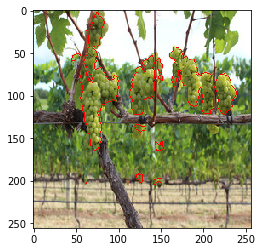

In [18]:
for i in range(30):
    src = './test/'+str(i)+'.jpg'
    predict = './test/predict/'+str(i).zfill(2)+'.png'
#     print(predict)
    save_cont2(src, predict)